In [107]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
import time

rcParams["figure.figsize"] = 10,5
%matplotlib inline

In [113]:
class Perceptron(object):
    
    """
    Perceptron classifier.
    
    Parameters
    ----------
    eta : float
          Learning rate (between 0.0 and 1.0)
    n_iter: int
       Passes(epochs) over the training set
       
    Attributes
    w_ : 1d-array
    weights afters fitting
    errors_ : list
    Number of misclassification in every epoch
    
    
    """
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """
        Fit method for training data
        
        Parameters
        ------
        X: {array-like} , shape = {n_samples, n_sfeatures}
        Training vectors, where n_samples is the number of samples
        n_features = number of features in the training set
        
        y : {array-like} , shape = [n_samples]
        
        Returns
        ----
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """
        Calculates the net input 
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Return class label after unit step
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [114]:
#reading a csv file whihc will take input of arrays which will be a linearly seperable class
df = pd.read_csv('iris.csv', header = None)

In [115]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [116]:
y = df.iloc[0:100, 4].values

negative_class = -1
positive_class = 1

condition=y == "Iris-setosa"
y = np.where(condition, 
             negative_class,
             positive_class)

X = data.iloc[0:100, [0, 2]].values


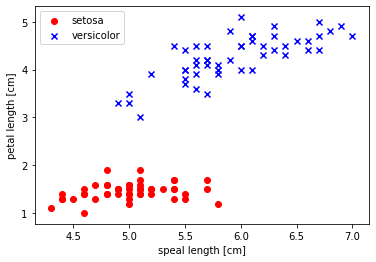

In [117]:
sepal_length = X[0:50, 0]
petal_length = X[0:50, 1]
color = "red"
marker = "o"
label = "setosa"
plt.scatter(x = sepal_length,
           y = petal_length,
           color=color,
           marker=marker,
           label=label)

sepal_length = X[50:100, 0] 
petal_length = X[50:100, 1]
color = "blue"
marker = "x"
label = "versicolor"
plt.scatter(x = sepal_length,
           y = petal_length,
           color=color,
           marker=marker,
           label=label)

plt.xlabel("speal length [cm]")
plt.ylabel("petal length [cm]")

location = "upper left"
plt.legend(loc = location)

In [124]:
tic = time.time()

eta = 0.1
n_iter = 10
ppn = Perceptron(eta=eta, n_iter = n_iter)

ppn.fit(X,
       y)

    
elapsed = time.time() - tic

print ("The time required for incremental")
print (elapsed)

The time required for incremental
0.04393315315246582


Text(0, 0.5, 'no. of epochs')

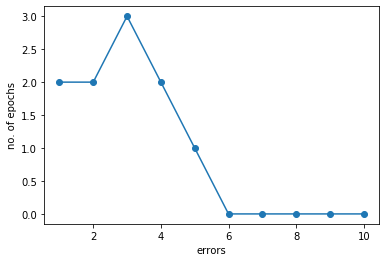

In [125]:
#plot the misclassifications 
epochs = range(1, len(ppn.errors_) + 1)
misclassifications = ppn.errors_
marker = "o"
plt.plot(epochs, 
        misclassifications,
        marker = marker)

plt.xlabel("errors")
plt.ylabel("no. of epochs")

In [126]:

tic = time.time()

def plot_decision_regions(X,y, classifier, resolution = 0.02):
    """
    Convenience functions
    """
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, 
                                      x1_max,
                                      resolution),
                           np.arange(x2_min, 
                                      x2_max,
                                      resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),
                                    xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1,
                xx2,
                Z,
                alpha = 0.4,
                cmap = cmap)
    
    plt.xlim(xx1.min(),
             xx1.max())
    
    plt.ylim(xx2.min(),
             xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.8,
                    c = cmap(idx),
                    marker = markers[idx],
                    label = cl)
        


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


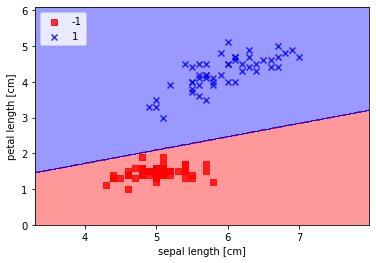

In [127]:
X = X
y = y
classifier=ppn
plot_decision_regions(X=X,
                      y=y,
                      classifier=classifier)

plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")

location = "upper left"
plt.legend(loc=location)


In [128]:
class BatchGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        
        return self.net_input(X)
    
    def predict(self, X):
        
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


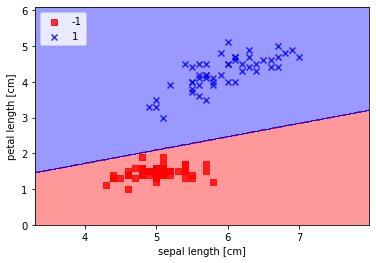

In [130]:
X = X
y = y
classifier=ppn
plot_decision_regions(X=X,
                      y=y,
                      classifier=classifier)

plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")

location = "upper left"
plt.legend(loc=location)


The time required for incremental
0.05389285087585449


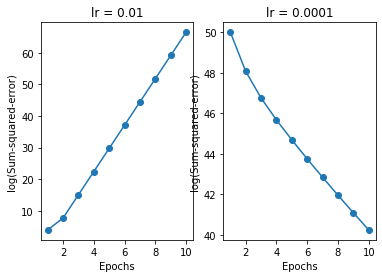

In [129]:

tic = time.time()

nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols)

n_iter = 10
eta = 0.01
bGD1 = BatchGD(n_iter = n_iter, 
               eta=eta)

bGD1.fit(X,
         y)

epochs = range(1, len(bGD1.cost_) + 1)
misclassifications = np.log(bGD1.cost_)
marker = "o"

ax[0].plot(epochs, 
           misclassifications,
           marker=marker)

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("lr = 0.01")

n_iter = 10
eta = 0.0001
bGD2 = BatchGD(n_iter = n_iter, 
               eta = eta)

bGD2.fit(X,
         y)

epochs = range(1, len(bGD2.cost_) + 1)
misclassifications = bGD2.cost_
marker = "o"

ax[1].plot(epochs, 
           misclassifications,
           marker=marker)

ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title("lr = 0.0001")

  
elapsed = time.time() - tic

print ("The time required for incremental")
print (elapsed)


Time taken for batch gradient descent and comparing two different learning rates

Decaying gradient descent

In [132]:
class BatchGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += 0.8**(self.eta) * X.T.dot(errors)
            self.w_[0] += 0.8**(self.eta) * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        
        return self.net_input(X)
    
    def predict(self, X):
        
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

The time required for incremental
0.027985334396362305


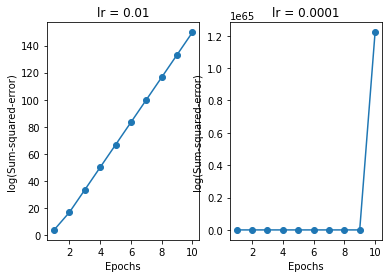

In [133]:

tic = time.time()

nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols)

n_iter = 10
eta = 0.01
bGD1 = BatchGD(n_iter = n_iter, 
               eta=eta)

bGD1.fit(X,
         y)

epochs = range(1, len(bGD1.cost_) + 1)
misclassifications = np.log(bGD1.cost_)
marker = "o"

ax[0].plot(epochs, 
           misclassifications,
           marker=marker)

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("lr = 0.01")

n_iter = 10
eta = 0.0001
bGD2 = BatchGD(n_iter = n_iter, 
               eta = eta)

bGD2.fit(X,
         y)

epochs = range(1, len(bGD2.cost_) + 1)
misclassifications = bGD2.cost_
marker = "o"

ax[1].plot(epochs, 
           misclassifications,
           marker=marker)

ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title("lr = 0.0001")

  
elapsed = time.time() - tic

print ("The time required for incremental")
print (elapsed)


Adaptive learning rate:

In [136]:
class BatchGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            if errors.all() >= 0.5:
                self.w_[1:] += 0.9*(self.eta) * X.T.dot(errors)
                self.w_[0] += 0.9*(self.eta) * errors.sum()
                cost = (errors ** 2).sum() / 2.0
                self.cost_.append(cost)
            else:
                self.w_[1:] += 1.02*(self.eta) * X.T.dot(errors)
                self.w_[0] += 1.02*(self.eta) * errors.sum()
                cost = (errors ** 2).sum() / 2.0
                self.cost_.append(cost)
                
        return self
    
    def net_input(self, X):
        
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        
        return self.net_input(X)
    
    def predict(self, X):
        
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

The time required for incremental
0.0546879768371582


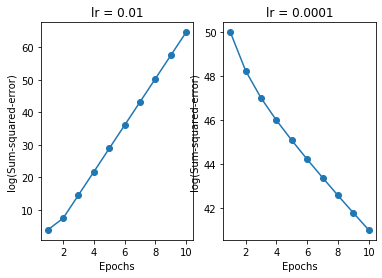

In [137]:

tic = time.time()

nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows,
                       ncols=ncols)

n_iter = 10
eta = 0.01
bGD1 = BatchGD(n_iter = n_iter, 
               eta=eta)

bGD1.fit(X,
         y)

epochs = range(1, len(bGD1.cost_) + 1)
misclassifications = np.log(bGD1.cost_)
marker = "o"

ax[0].plot(epochs, 
           misclassifications,
           marker=marker)

ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("lr = 0.01")

n_iter = 10
eta = 0.0001
bGD2 = BatchGD(n_iter = n_iter, 
               eta = eta)

bGD2.fit(X,
         y)

epochs = range(1, len(bGD2.cost_) + 1)
misclassifications = bGD2.cost_
marker = "o"

ax[1].plot(epochs, 
           misclassifications,
           marker=marker)

ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title("lr = 0.0001")

  
elapsed = time.time() - tic

print ("The time required for incremental")
print (elapsed)
